In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)


Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [18]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**9.1.** Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

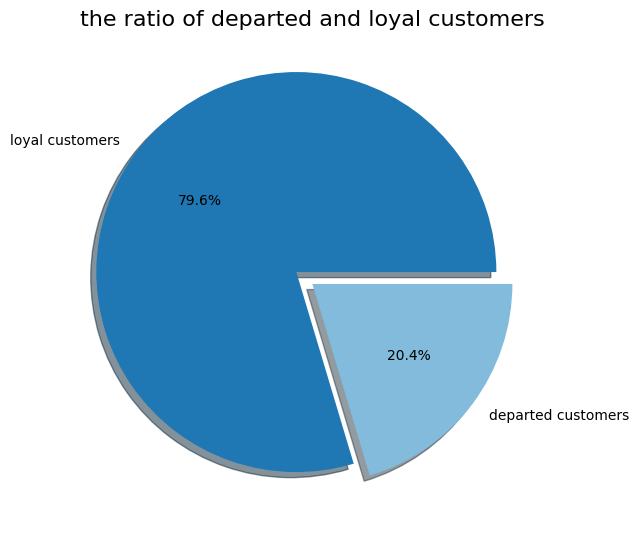

In [12]:
x = churn_data.Exited.value_counts()
labels = 'loyal customers', 'departed customers'
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    x,
    labels=labels,
    autopct='%.1f%%',
    explode = [0.1, 0],
    shadow=True
)

# adding informativeness
axes.set_title('the ratio of departed and loyal customers', fontsize=16)

plt.show();

**comment on the graph**

On the diagram we see that a fifth of the customers are leaving

**9.2.** Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

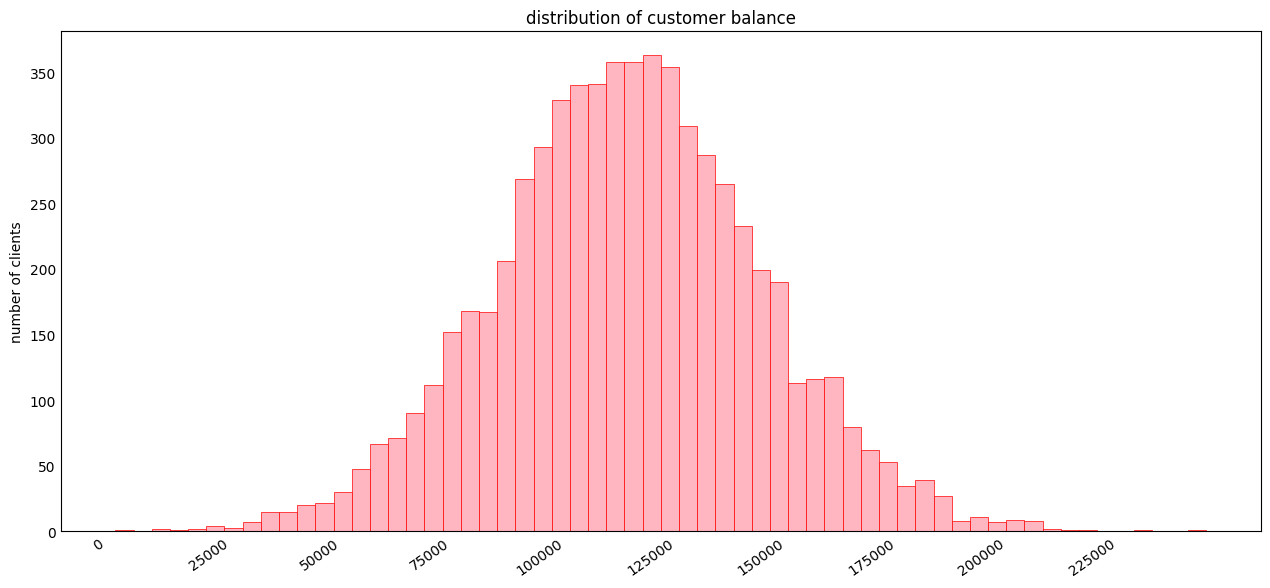

In [48]:
x =  churn_data[churn_data.Balance > 2500].Balance

fig = plt.figure(figsize=(12, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x, 
    bins=60, 
    color='lightpink',
    linewidth=0.5,
    edgecolor="red",
    
)

axes.set_ylabel('number of clients')
axes.set_title('distribution of customer balance')
axes.xaxis.set_tick_params(rotation=35)
plt.xticks(np.arange(0,250000,25000))
plt.show();


**comment on the graph**

On the histogram we see the normal distribution of customers depending on the amount of money in their bank accounts. The median value is around 125,000. In addition, pronounced stumps are visible on the graph, which requires additional data research.

**9.3.** Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

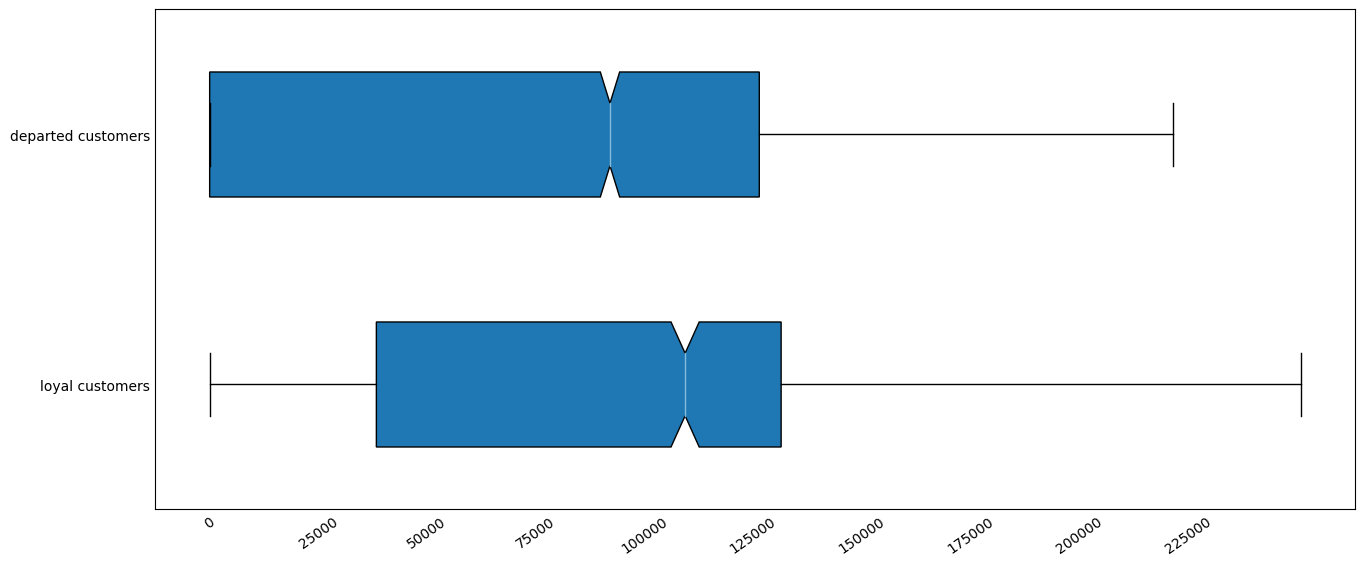

In [71]:
x =  churn_data[churn_data.Exited == 1].Balance
y =  churn_data[churn_data.Exited == 0].Balance
labels = 'loyal customers', 'departed customers'

fig = plt.figure(figsize=(12, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot(
    [x, y],
    vert=False,
    patch_artist=True,
    labels=labels,
    notch=True,
    widths=0.5,
    # color=('lightblue', 'lightgreen'),
    
)

# axes.set_ylabel('number of clients')
# axes.set_title('distribution of customer balance')
axes.xaxis.set_tick_params(rotation=35)
plt.xticks(np.arange(0,250000,25000))
plt.show();

**comment on the graph**
